In [1]:
from sklearn.utils import *
from sklearn.metrics import *
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import os

In [2]:
FILE ='data/Regular_Season_Batter.csv'
# 자료: https://dacon.io/competitions/official/62540/overview/description
# 주제: 2019년 타자들의 상반기 OPS를 예측하는 모델

In [3]:
opsDF=pd.read_csv(FILE)

In [4]:
opsDF.head(3)
# id, 이름 년도 팀 타율 타수 출전게임수 득점 안타....

,batter_id,batter_name,year,team,avg,G,AB,R,H,2B,...,GDP,SLG,OBP,E,height/weight,year_born,position,career,OPS,starting_salary
0,0,가르시아,2018,LG,0.339,50,183,27,62,9,...,3,0.519,0.383,9,177cm/93kg,1985년 04월 12일,내야수(우투우타),쿠바 Ciego de Avila Maximo Gomez Baez(대),0.902,NaN
1,1,강경학,2011,한화,0.000,2,1,0,0,0,...,0,0.000,0.000,1,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,0.000,10000만원
2,1,강경학,2014,한화,0.221,41,86,11,19,2,...,1,0.349,0.337,6,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,0.686,10000만원


In [5]:
# 상관계수 확인
sel=opsDF.corr()['OPS']
# 출류율+장타율=타자들을 평가하는 스탯

In [6]:
sel.sort_values(ascending=False)
# 'avg'(타율),'TB'(루타수),'SLG'(장타율),

OPS          1.000000
SLG          0.971387
OBP          0.935797
avg          0.919696
TB           0.589841
RBI          0.576652
H            0.571506
R            0.558242
2B           0.556933
AB           0.546879
BB           0.546328
G            0.534539
HR           0.525660
SO           0.507726
GDP          0.460984
HBP          0.418250
CS           0.283267
E            0.280126
3B           0.269084
SB           0.240282
year         0.054094
batter_id   -0.039554
Name: OPS, dtype: float64

In [7]:
opsDF = opsDF[['avg','TB','SLG','OPS']]

In [8]:
opsDF

,avg,TB,SLG,OPS
0,0.339,95,0.519,0.902
1,0.000,0,0.000,0.000
2,0.221,30,0.349,0.686
3,0.257,101,0.325,0.673
4,0.158,26,0.257,0.489
...,...,...,...,...
2449,0.000,0,0.000,0.000
2450,0.000,0,0.000,0.000
2451,0.000,0,0.000,0.000
2452,0.291,47,0.402,0.761


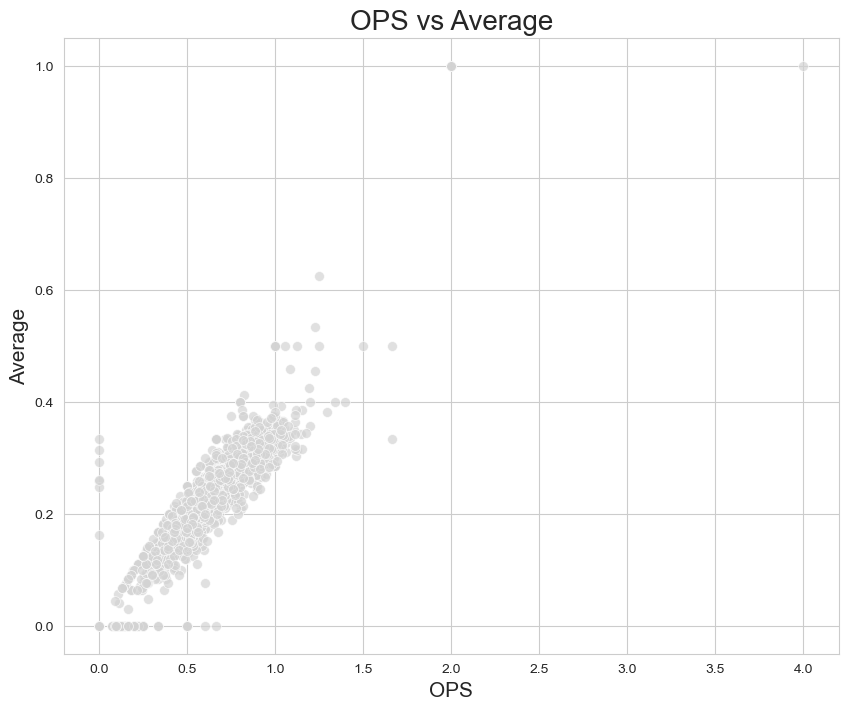

In [9]:
# 선형 관계 여부
# 타겟 : OPS, 독립 : 'avg'(타율),'TB'(루타수),'SLG'(장타율),
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(10, 8))

sns.scatterplot(x="OPS", y="avg", data=opsDF, color="lightgray", ax=ax, s=50, alpha=0.7)

ax.set_xlabel("OPS", fontsize=15)
ax.set_ylabel("Average", fontsize=15)
ax.set_title("OPS vs Average", fontsize=20)

plt.show()

Text(0.5, 1.0, 'OPS vs TB')

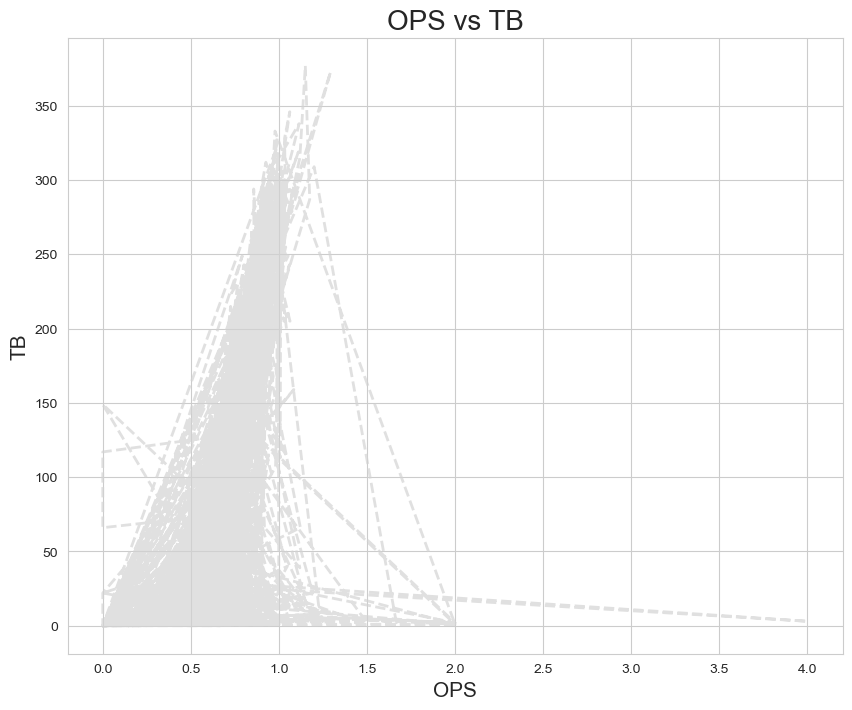

In [10]:
sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(10, 8))

ax.plot(opsDF.OPS, opsDF.TB, color="lightgray", linestyle="--", linewidth=2, alpha=0.7)

ax.set_xlabel("OPS", fontsize=15)
ax.set_ylabel("TB", fontsize=15)
ax.set_title("OPS vs TB", fontsize=20)


Text(0.5, 1.0, 'OPS vs TB')

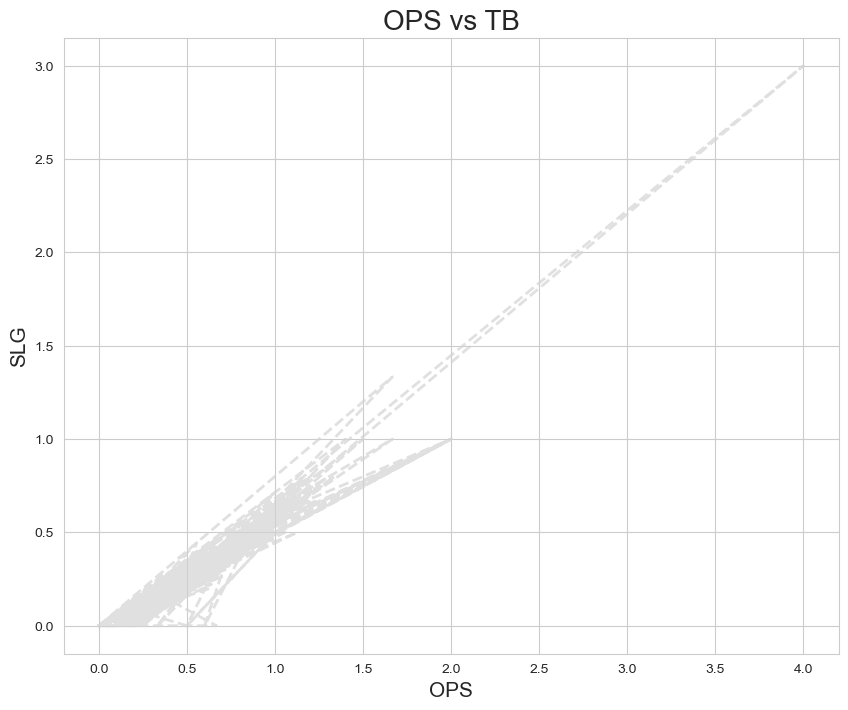

In [11]:
sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(10, 8))
ax.plot(opsDF.OPS, opsDF.SLG, color="lightgray", linestyle="--", linewidth=2, alpha=0.7)

ax.set_xlabel("OPS", fontsize=15)
ax.set_ylabel("SLG", fontsize=15)
ax.set_title("OPS vs TB", fontsize=20)

In [12]:
opsDF.info(),opsDF.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2454 entries, 0 to 2453
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   avg     2428 non-null   float64
 1   TB      2454 non-null   int64  
 2   SLG     2428 non-null   float64
 3   OPS     2428 non-null   float64
dtypes: float64(3), int64(1)
memory usage: 76.8 KB


(None,
 avg    26
 TB      0
 SLG    26
 OPS    26
 dtype: int64)

In [13]:
opsDF = opsDF.dropna(subset=['avg']) # 타율
opsDF = opsDF.dropna(subset=['SLG']) # 장타율
# opsDF = opsDF.dropna(subset=['OBP']) # 출루율
opsDF = opsDF.dropna(subset=['TB'])  # 루타 수
opsDF = opsDF.dropna(subset=['OPS'])  

In [14]:
opsDF["avg"] = round(opsDF["avg"]*100,1)
opsDF["SLG"] = round(opsDF["SLG"]*100,1) 
# opsDF["OBP"] = round(opsDF["OBP"]*100,1)

In [15]:
opsDF.head()

,avg,TB,SLG,OPS
0,33.9,95,51.9,0.902
1,0.0,0,0.0,0.000
2,22.1,30,34.9,0.686
3,25.7,101,32.5,0.673
4,15.8,26,25.7,0.489


In [16]:
#수치형 특성 데이터 스케일링 
st=StandardScaler()
st.fit(opsDF[opsDF.columns[:-1]])
st_data= st.transform(opsDF[opsDF.columns[:-1]])

In [17]:
data=pd.DataFrame(st_data)
target = opsDF[opsDF.columns[-1]]
data

,0,1,2
0,1.030693,0.118555,1.072717
1,-2.413733,-1.028555,-2.105477
2,-0.168252,-0.666309,0.031690
3,0.197528,0.191004,-0.115278
4,-0.808366,-0.714609,-0.531689
...,...,...,...
2423,-2.413733,-1.028555,-2.105477
2424,-2.413733,-1.028555,-2.105477
2425,-2.413733,-1.028555,-2.105477
2426,0.542987,-0.461037,0.356246


In [18]:
data.columns = ['타율', '장타율', '루타']
data

,타율,장타율,루타
0,1.030693,0.118555,1.072717
1,-2.413733,-1.028555,-2.105477
2,-0.168252,-0.666309,0.031690
3,0.197528,0.191004,-0.115278
4,-0.808366,-0.714609,-0.531689
...,...,...,...
2423,-2.413733,-1.028555,-2.105477
2424,-2.413733,-1.028555,-2.105477
2425,-2.413733,-1.028555,-2.105477
2426,0.542987,-0.461037,0.356246


In [19]:
# from sklearn.utils import *
# import warnings

# warnings.filterwarnings('ignore')

# rets = all_estimators(type_filter='regressor')

# result=[]
# for name, estimator_ in rets:
#     try:
#         model=estimator_()
#         model.fit(x_t, y_t)
#         # pred_y = model.predict(x_test)
#         sc = model.score(x_t,y_t)
#         # rmse = metrics.r2_score(y_test,pred_y)
#         result.append((name, round(sc, 2)))
#     except Exception:
#         pass

# sorted(result, key=lambda x : x[1], reverse=True)

### 앙상블 x => DecisionTreeRegressor

In [20]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [21]:
# 학습용 & 테스트용 데이터 분리
X_t, X_test, Y_t, Y_test = train_test_split(data,target,test_size=0.2,random_state=123456) 

In [22]:
# 모델 생성 및 학습
model = DecisionTreeRegressor(random_state=42)
model.fit(X_t, Y_t)

DecisionTreeRegressor(random_state=42)

In [23]:
model.score(X_t,Y_t)

0.9860774690688957

In [24]:
# 예측
Y_pre = model.predict(X_test)

In [25]:
# mean_squrared_error 확인
# mean_squared_error (MSE)는 회귀 모델의 예측값과 실제값의 차이를 제곱하여 평균한 값입니다. MSE가 작을수록 모델의 예측이 더 정확하다는 것을 의미
mse = mean_squared_error(Y_test, Y_pre)
print("MSE:", mse)

MSE: 0.012334512508191788


In [26]:
accuracy= r2_score(Y_test,Y_pre)
accuracy

0.853448014153841

In [27]:
from sklearn.model_selection import GridSearchCV

In [28]:
param_grid = {
    "max_depth": [3, 5, 7, 9],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
}

In [29]:
# GridSearchCV 수행 : 교차검증 + 최적의 하이퍼 파라미터 튜닝
grid_search = GridSearchCV(
    model,
    param_grid,
    cv=5,  # 5-fold 교차 검증 사용
    scoring="neg_mean_squared_error",  # 평가 지표로 MSE 사용
)
grid_search.fit(X_t, Y_t)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=42),
             param_grid={'max_depth': [3, 5, 7, 9],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='neg_mean_squared_error')

In [30]:
# 최적의 하이퍼파라미터와 MSE 출력
# mean_squared_error (MSE)는 회귀 모델의 예측값과 실제값의 차이를 제곱하여 평균한 값입니다. MSE가 작을수록 모델의 예측이 더 정확하다는 것을 의미
print("Best Parameters:", grid_search.best_params_)
print("Best MSE:", -grid_search.best_score_)

Best Parameters: {'max_depth': 9, 'min_samples_leaf': 1, 'min_samples_split': 5}
Best MSE: 0.0022252290099692646


In [31]:
opsModel=grid_search.best_estimator_

In [32]:
opsModel.fit(X_t, Y_t)

DecisionTreeRegressor(max_depth=9, min_samples_split=5, random_state=42)

In [33]:
Y_pre = opsModel.predict(X_test)

In [34]:
opsModel.score(X_t,Y_t)

0.9793678752097776

In [35]:
accuracy= r2_score(Y_test,Y_pre)
accuracy

0.8577883239715821

In [36]:
from joblib import dump
# 모델 저장
dump(opsModel,'opsModel1.pkl')

['opsModel1.pkl']

In [37]:
new_data = st.transform(np.array([[22.1,30,34.9]]))

# 예측값
opsModel.predict(new_data)

C:\Users\kha\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\kha\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([0.66195265])

### 앙상블 => BaggingRegressor

In [38]:
from sklearn.ensemble import BaggingRegressor

In [39]:
x_t, x_test, y_t, y_test = train_test_split(data,target,test_size=0.2,random_state=123456) # 학습용으로 빼놓은 데이터

In [40]:
base_model = DecisionTreeRegressor(max_depth=5)
bagging_model = BaggingRegressor(base_estimator=base_model, n_estimators=10, random_state=42)

In [41]:
bagging_model.fit(x_t, y_t)

BaggingRegressor(base_estimator=DecisionTreeRegressor(max_depth=5),
                 random_state=42)

In [42]:
bagging_model.score(x_t,y_t)

0.9703928235985718

In [43]:
y_pre = bagging_model.predict(x_test)

In [44]:
accuracy= r2_score(y_test,y_pre)
accuracy

0.843139132463959

In [45]:
# Define BaggingRegressor and hyperparameters
base_model = DecisionTreeRegressor()
bagging_model = BaggingRegressor(base_estimator=base_model)

param_grid = {
    'base_estimator__max_depth': [3, 5, 7],
    'n_estimators': [10, 50, 100]
}

# Create GridSearchCV object
grid_search = GridSearchCV(estimator=bagging_model, param_grid=param_grid, cv=5, n_jobs=-1)

# Fit GridSearchCV object to training data
grid_search.fit(x_t, y_t)

GridSearchCV(cv=5,
             estimator=BaggingRegressor(base_estimator=DecisionTreeRegressor()),
             n_jobs=-1,
             param_grid={'base_estimator__max_depth': [3, 5, 7],
                         'n_estimators': [10, 50, 100]})

In [46]:
# 최적의 하이퍼파라미터와 MSE 출력
# mean_squared_error (MSE)는 회귀 모델의 예측값과 실제값의 차이를 제곱하여 평균한 값입니다. MSE가 작을수록 모델의 예측이 더 정확하다는 것을 의미
print("Best Parameters:", grid_search.best_params_)
print("Best MSE:", -grid_search.best_score_)

Best Parameters: {'base_estimator__max_depth': 7, 'n_estimators': 50}
Best MSE: -0.9696886996535532


In [47]:
opsModel2=grid_search.best_estimator_

In [48]:
opsModel2.fit(x_t, y_t)

BaggingRegressor(base_estimator=DecisionTreeRegressor(max_depth=7),
                 n_estimators=50)

In [49]:
y_pre = opsModel2.predict(x_test)

In [50]:
opsModel2.score(x_t,y_t)

0.9776175006514296

In [51]:
accuracy= r2_score(y_test,y_pre)
accuracy

0.8641790962020137

In [52]:
new_data = st.transform(np.array([[25.7,101,32.5]]))

# 예측값
opsModel2.predict(new_data)

C:\Users\kha\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\kha\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but BaggingRegressor was fitted with feature names
  warnings.warn(


array([0.65701623])

In [53]:
# 모델 저장
dump(opsModel2,'opsModel2.pkl')

['opsModel2.pkl']